#Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
pd.set_option("display.max.columns", None)

#Load Data

In [3]:
missing_values = [' ', ' -  '] # missing value pada dataset
nyc = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


#Preprocessing

In [4]:
nyc.shape

(84548, 22)

In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
nyc.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       83810 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   ZIP CODE                        84548 non-null  int64  
 9   RESIDENTIAL UNITS               84548 non-null  int64  
 10  COMMERCIAL UNITS                84548 non-null  int64  
 11  TOTAL UNITS                     84548 non-null  int64  
 12  LAND SQUARE FEET                

In [8]:
def changeborough(borough):
    if borough == '1':
        return 'Manhattan'
    elif borough == '2':
        return 'Bronx'
    elif borough == '3':
        return 'Brooklyn'
    elif borough == '4':
        return 'Queens'
    elif borough == '5':
        return 'Staten Island'
    else:
        return np.nan
nyc[['BOROUGH','TAX CLASS AT TIME OF SALE']] = nyc[['BOROUGH','TAX CLASS AT TIME OF SALE']].astype('str')
nyc['BOROUGH'] =  nyc['BOROUGH'].apply(changeborough)

In [9]:
nyc = nyc[(nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].notnull())]

#Measure of Central Tendency : Mean

##### Menghitung rata-rata SALE PRICEnya tiap BOROUGH

In [10]:
nyc.groupby(['BOROUGH'])['SALE PRICE'].mean()

BOROUGH
Bronx            5.901936e+05
Brooklyn         8.344884e+05
Manhattan        1.851722e+07
Queens           9.123055e+05
Staten Island    5.286038e+05
Name: SALE PRICE, dtype: float64

##### Menghitung rata-rata LAND SQUARE FEET tiap BOROUGH

In [11]:
nyc.groupby(['BOROUGH'])['LAND SQUARE FEET'].mean()

BOROUGH
Bronx            3947.091502
Brooklyn         2166.259825
Manhattan        5611.433410
Queens           4242.383002
Staten Island    6238.279442
Name: LAND SQUARE FEET, dtype: float64

##### Menghitung rata-rata GROSS SQUARE FEET tiap BOROUGH

In [12]:
nyc.groupby(['BOROUGH'])['GROSS SQUARE FEET'].mean()

BOROUGH
Bronx             4524.350262
Brooklyn          2570.354597
Manhattan        36598.780712
Queens            3300.683281
Staten Island     2305.117912
Name: GROSS SQUARE FEET, dtype: float64

In [13]:
nyc['GROSS SQUARE FEET'].mean()

4042.3168979448446

#Measure of Central Tendency : Median

##### Median kolom total units

In [14]:
median_totalunits = nyc['TOTAL UNITS'].median()
print('Median of Total Units:', median_totalunits)

Median of Total Units: 1.0


##### Median kolom LAND SQUARE FEET

In [15]:
median_landsquarefeet = nyc['LAND SQUARE FEET'].median()
print('Median of Land Square Feet:', median_landsquarefeet)

Median of Land Square Feet: 2300.0


##### Mediam kolom GROSS SQUARE FEET

In [16]:
median_grosssquarefeet = nyc['GROSS SQUARE FEET'].median()
print('Median of Gross Square Feet:', median_grosssquarefeet)

Median of Gross Square Feet: 1680.0


##### Median kolom sale price

In [17]:
median_saleprice = nyc['SALE PRICE'].median()
print('Median of Sale Price:', median_saleprice)

Median of Sale Price: 480000.0


#Measure of Tendency : Modus

##### Modus kolom BOROUGH

In [18]:
mode_BOROUGH = nyc['BOROUGH'].mode()
print('Mode of Borough:', mode_BOROUGH.values)

Mode of Borough: ['Brooklyn']


##### Modus kolom NEIGHBORHOOD

In [19]:
mode_NEIGHBORHOOD = nyc['NEIGHBORHOOD'].mode()
print('Mode of Neighborhood:', mode_NEIGHBORHOOD.values)

Mode of Neighborhood: ['BEDFORD STUYVESANT']


##### Modus kolom BUILDING CLASS CATEGORY

In [20]:
mode_BUILDINGCLASSCATEGORY = nyc['BUILDING CLASS CATEGORY'].mode()
print('Mode of Neighborhood:', mode_BUILDINGCLASSCATEGORY.values)

Mode of Neighborhood: ['01 ONE FAMILY DWELLINGS                    ']


##### Modus Kolom TAX CLASS AT PRESENT

In [21]:
mode_TAXCLASSATPRESENT = nyc['TAX CLASS AT PRESENT'].mode()
print('Mode of Neighborhood:', mode_TAXCLASSATPRESENT.values)

Mode of Neighborhood: ['1']


##### Modus kolom BUILDING CLASS AT PRESENT

In [22]:
mode_BUILDINGCLASSATPRESENT = nyc['BUILDING CLASS AT PRESENT'].mode()
print('Mode of Neighborhood:', mode_BUILDINGCLASSATPRESENT.values)

Mode of Neighborhood: ['A1']


#Measure of Spread : Range

##### Range LAND SQUARE FEET

In [23]:
range_LAND_SQUARE_FEET = np.ptp(nyc['LAND SQUARE FEET'])
print(range_LAND_SQUARE_FEET)

4228300.0


##### Range GROSS SQUARE FEET

In [24]:
range_GROSS_SQUARE_FEET = np.ptp(nyc['GROSS SQUARE FEET'])
print(range_GROSS_SQUARE_FEET)

3750565.0


#Measure of Spread : Variance

##### Variance kolom TOTAL UNITS

In [25]:
var_TOTAL_UNITS = np.var(nyc['TOTAL UNITS'], ddof=1)
print('Total Units Variance:', round(var_TOTAL_UNITS,1))

Total Units Variance: 514.0


##### Variance kolom LAND SQUARE FEET

In [26]:
var_LAND_SQUARE_FEET = np.var(nyc['LAND SQUARE FEET'], ddof=1)
print('LAND SQUARE FEET Variance:', round(var_LAND_SQUARE_FEET,1))

LAND SQUARE FEET Variance: 1207659176.1


##### Variance kolom GROSS SQUARE FEET

In [27]:
var_GROSS_SQUARE_FEET = np.var(nyc['GROSS SQUARE FEET'], ddof=1)
print('GROSS SQUARE FEET Variance:', round(var_GROSS_SQUARE_FEET,1))

GROSS SQUARE FEET Variance: 1227290090.9


##### Variance kolom SALE PRICE

In [28]:
var_SALE_PRICE = np.var(nyc['SALE PRICE'], ddof=1)
print('SALE PRICE Variance:', round(var_SALE_PRICE,1))

SALE PRICE Variance: 179595088101951.0


#Measure of Spread : Standard Deviation

##### Standard Deviation kolom TOTAL UNITS

In [29]:
std_TOTAL_UNITS = var_TOTAL_UNITS**0.5
print('TOTAL UNITS STD : ', round(std_TOTAL_UNITS,1))

TOTAL UNITS STD :  22.7


#####Standard Deviation kolom LAND SQUARE FEET

In [30]:
std_LAND_SQUARE_FEET = var_LAND_SQUARE_FEET**0.5
print('LAND SQUARE FEET STD : ', round(std_LAND_SQUARE_FEET,1))

LAND SQUARE FEET STD :  34751.4


#####Standard Deviation GROSS SQUARE FEET

In [31]:
std_GROSS_SQUARE_FEET = var_GROSS_SQUARE_FEET**0.5
print('GROSS SQUARE FEET STD : ', round(std_GROSS_SQUARE_FEET,1))

GROSS SQUARE FEET STD :  35032.7


#####Standard Deviation SALE PRICE

In [32]:
std_SALE_PRICE = var_SALE_PRICE**0.5
print('SALE PRICE STD : ', round(std_SALE_PRICE,1))

SALE PRICE STD :  13401309.2


#Probability Distribution

##### Distribusi SALE PRICE disetiap BOROUGH

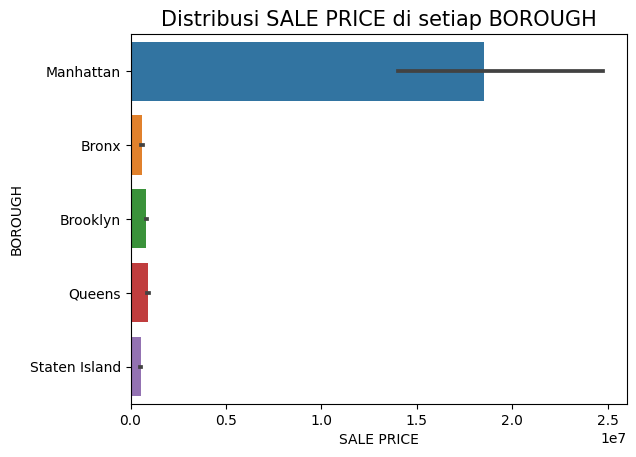

In [33]:
sns.barplot(x = nyc['SALE PRICE'], y = nyc['BOROUGH'])
plt.title('Distribusi SALE PRICE di setiap BOROUGH',size=15)
plt.show()

<ipython-input-36-f9502ca2333e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nyc[nyc['BOROUGH'] == 'Manhattan']['SALE PRICE'])


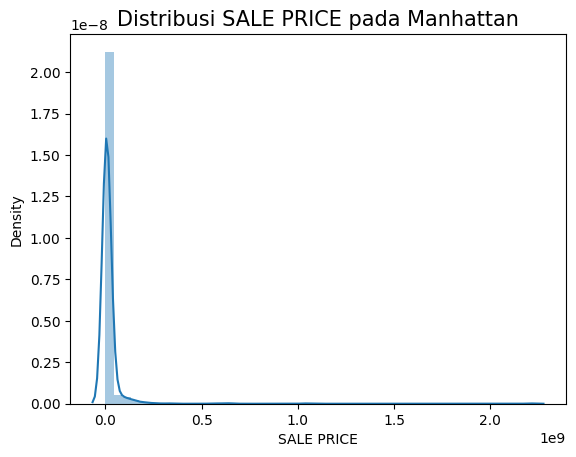

In [36]:
sns.distplot(nyc[nyc['BOROUGH'] == 'Manhattan']['SALE PRICE'])
plt.title('Distribusi SALE PRICE pada Manhattan',size=15)
plt.show()

Berdasarkan plot diatas distribusi sale price pada Manhattan merupakan distribusi yang tidak normal. Hal ini dapat disebabkan oleh penyebaran data yang tidak terdistribusi.

#Confidence Intervals

#####Berapa rata-rata SALE PRICE BRONX dengan CI 95%?

In [44]:
bronx = nyc[nyc['BOROUGH'] == 'Bronx']

In [47]:
sample_data = []
n = 1000
for sample in range(0,100):
  values = np.random.choice(a=bronx['SALE PRICE'], size = n)
  sample = np.mean(values)
  sample_data.append(sample)

In [50]:
median_sample_data = np.median(sample_data)
median_sample_data

580152.951

In [51]:
mean_sample_data = np.mean(sample_data)
mean_sample_data

594782.34551

In [53]:
std_sample_data = np.std(sample_data)
std_sample_data

87069.40011004261

In [54]:
standarderror = std_sample_data/np.sqrt(n)
standarderror

2753.3761885225

In [56]:
z_score = 1.96

lower = mean_sample_data - (z_score*standarderror)  # batas bawah CI
upper = mean_sample_data + (z_score*standarderror)  # batas atas CI
lower, upper

(589385.7281804959, 600178.9628395041)

Dapat disimpulkan bahwa rata-rata SALE PRICE dengan CI 95% dari populasi Bronx berkisar antara 58 juta hingga 60 juta USD

#Hypothesis Testing

#####Apakah Total Unit pada BOROUGH Staten Island lebih besar dari BOROUGH Queens?

ho => Total Unit pada BOROUGH Staten Island >= Total Unit pada BOROUGH Queens (null hypothesis) <br> 
ha => Total Unit pada BOROUGH Staten Island < Total Unit pada BOROUGH Queens

In [81]:
Staten = nyc[(nyc['BOROUGH'] == 'Staten Island')]
Staten['TOTAL UNITS'].sum()

9990

In [82]:
Queens = nyc[(nyc['BOROUGH'] == 'Queens')]
Queens['TOTAL UNITS'].sum()

47128

In [83]:
# menghitung ztest dan mendapatkan nilai p value
sm.stats.ztest(Staten["TOTAL UNITS"], Queens["TOTAL UNITS"],alternative='two-sided')

(-3.7121701284567616, 0.00020548978345031815)

Karena p-value (0.0002) lebih kecil dari alpha (0.05), null hypothesis dapat direject bahwa total units di Staten Island lebih besar dan sama dengan total units di Queens. Jadi, total units di Staten Island yakni 9990 lebih kecil dari total units di Queens yakni 47128.

#Kesimpulan

* Rata rata Sale Price tertinggi terletak pada Brooklyn dan terendah pada Manhattan.
* Rata rata Land Square Feet tertinggi terletak pada Staten Island dan terendah pada Brooklyn.
* Rata rata Groos Square Feet tertinggi terletak pada Manhattan dan terendah pada Staten Island.
* Median total units sama dengan 1.0, land square feet sama dengan 2300.0, gross square feet sama dengan 1680.0, sale price sama dengan 480000.0
* Modus pada Borough yakni Brooklyn, pada Neighborhood yakni Bedford Stuyvesant, pada Building class category yakni 01 One Family Dwellings, pada Tax class at Present yakni 1, pada Building class at present yakni A1.
* Range Land Square Feet yakni 4228300.0 dan Gross Square Feet yakni 3750565.0
* Variance pada Total Units yakni 514.0, pada Land Square Feet yakni 1207659176.1, pada Gross Square Feet yakni 1227290090.9, pada Sale Price yakni 179595088101951.0
* Std pada Total Units yakni 22.7, pada Land Square Feet yakni 34751.4, pada Gross Square Feet yakni 35032.7, pada Sale Price yakni 13401309.2
* Distribusi Sale Price pada Manhattan merupakan distrubusi tidak normal.
* Rata rata Sale Price dengan CI 95% pada Bronx berkisar antara 58 juta sampai 60 juta USD.
* Total units di Staten Island yakni 9990 lebih kecil dari total units di Queens yakni 47128.